<a href="https://colab.research.google.com/github/IssamMerikhi/PredictingFootballGames/blob/main/PredictingFootballGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Game Results

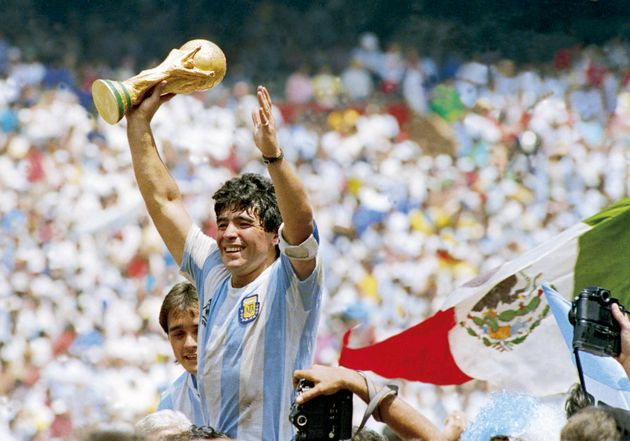



> Football is the most popular sport in the world
> There is a bench of data/actors behind a simple game :


*   Players - Coach - Staff - Marketing Team - Supporters 
*   Data : Win - Lose - Draw - Shot - On target - Passes
*   Salary - Transfer - Sponsoring - TV Industry
*   Wheather conditions - Feeling bewteen Players...






# Import Dependencies

In [ ]:
"""
Import all thedependencies.
"""


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
from matplotlib import *

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
Import the data and display a couple of rows.
"""

# Read data and drop redundant column.
data = pd.read_csv('PL.csv')

# Preview data.
data.head()


# FTR = Full time result
# FTHG = Full time home goals
# FTAG = Full time away goals
# HTR = Half time result
# HTHG = Half time home goals
# HTAG = Half time away goals
# ETR = Extra time Result
# ETHG = Extra time home goals
# ETAG = Extra time away goals
# PENR = Penalty shootout Result
# PENHG = Penalty shootout home goals
# PENAG = Penalty shootout away goals
# H_ST = Home team shots total
# H_SOG = Home team shots on goal
# H_SFG = Home team shots off goal
# H_PT = Home team possession time
# H_COR = Home team corners
# H_FL = Home team fouls
# H_TC = Home team yellow cards
# H_RC = Home team red cards
# A_ST = Away team shots total
# A_SOG = Away team shots on goal
# A_SFG = Away team shots off goal
# A_PT = Away team possession time
# A_COR = Away team corners
# A_FL = Away team fouls
# A_TC = Away team yellow cards
# A_RC = Away team red cards
# N/A = Not applicable
# SNV = Stat not available

,Date,Country,League,Type,Season,Home_Team,Away_team,FTR,FTHG,FTAG,HTR,HTHG,HTAG,ETR,ETHG,ETAG,PENR,PENHG,PENAG,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
0,2017-08-11,England,Premier League,LEAGUE,2017/2018,Arsenal,Leicester City,2,4,3,D,2,2,NaN,NaN,NaN,NaN,NaN,NaN,27,10,9,64,9,9,0,0,6,3,3,36,4,12,1,0
1,2017-08-12,England,Premier League,LEAGUE,2017/2018,Chelsea,Burnley,1,2,3,A,0,3,NaN,NaN,NaN,NaN,NaN,NaN,19,6,6,59,8,16,4,2,10,5,4,41,5,11,3,0
2,2017-08-12,England,Premier League,LEAGUE,2017/2018,Watford,Liverpool,0,3,3,H,2,1,NaN,NaN,NaN,NaN,NaN,NaN,9,4,4,49,3,14,0,0,14,5,8,51,3,8,3,0
3,2017-08-12,England,Premier League,LEAGUE,2017/2018,Brighton & Hove Albion,Manchester City,1,0,2,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2,27,3,6,0,0,14,4,5,73,10,9,2,0
4,2017-08-12,England,Premier League,LEAGUE,2017/2018,Southampton,Swansea City,0,0,0,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,29,2,16,59,13,10,2,0,4,0,2,41,0,13,1,0


In [ ]:
data.FTR.unique()
# 2 means Home Team Win
# 1 means Away Team Win
# 0 means Draw

array([2, 1, 0])

In [ ]:
print('The dataframe shape is :', data.shape)
print('Very basic stuff:')
data.describe()

The dataframe shape is : (1139, 35)
Very basic stuff:


,FTR,FTHG,FTAG,HTHG,HTAG,ETR,ETHG,ETAG,PENR,PENHG,PENAG,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,0.0,0.0,0.0,0.0,0.0,0.0,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,1.232660,1.539947,1.202809,0.662862,0.546971,NaN,NaN,NaN,NaN,NaN,NaN,13.633889,4.647059,6.639157,50.861282,5.740123,10.239684,1.568920,0.049166,11.080773,3.919227,5.437226,49.138718,4.679543,10.533802,1.733099,0.064091
std,0.798364,1.299903,1.185794,0.848103,0.760536,NaN,NaN,NaN,NaN,NaN,NaN,5.691878,2.633453,3.611237,12.926386,3.066497,3.394864,1.264404,0.224287,4.907095,2.357087,3.240813,12.926386,2.782704,3.550718,1.281497,0.248584
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,3.000000,4.000000,42.000000,3.000000,8.000000,1.000000,0.000000,7.000000,2.000000,3.000000,39.000000,3.000000,8.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,4.000000,6.000000,51.000000,5.000000,10.000000,1.000000,0.000000,11.000000,4.000000,5.000000,49.000000,4.000000,10.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,6.000000,9.000000,61.000000,8.000000,12.000000,2.000000,0.000000,14.000000,5.000000,7.000000,58.000000,6.000000,13.000000,3.000000,0.000000
max,2.000000,8.000000,9.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,16.000000,22.000000,83.000000,18.000000,23.000000,7.000000,2.000000,30.000000,15.000000,20.000000,83.000000,16.000000,26.000000,7.000000,2.000000


# Data Processing

In [ ]:
"""
Preparing the data. Our target Y will be FTR = Full Time Result.
That's the interesting variable. Others variables are features X.
We also have to scale the variables to avoid sizes problems.
"""


# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['H_ST','H_SOG','H_SFG','H_PT','H_COR','H_FL','H_YC','H_RC','A_ST','A_SOG','A_SFG','A_PT','A_COR','A_FL','A_YC','A_RC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [ ]:
"""
We have to drop all the str varibales, for our features we only want numbers !
We also display a couple of lines to have an little idea
"""

X_all = data.drop(['HTAG','HTHG','FTAG','FTHG','HTR','Date','FTR','Country','League','Type','Season','Home_Team','Away_team','ETR','ETHG','ETAG','PENR','PENHG','PENAG'],1)

# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
0,27,10,9,64,9,9,0,0,6,3,3,36,4,12,1,0
1,19,6,6,59,8,16,4,2,10,5,4,41,5,11,3,0
2,9,4,4,49,3,14,0,0,14,5,8,51,3,8,3,0
3,6,2,2,27,3,6,0,0,14,4,5,73,10,9,2,0
4,29,2,16,59,13,10,2,0,4,0,2,41,0,13,1,0


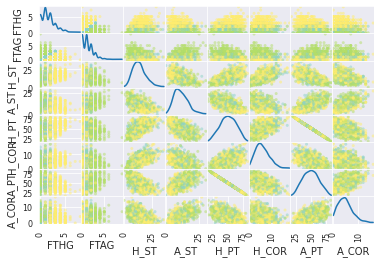

In [ ]:
"""
The easyiest way to have a graphical idea of our variables.
"""
sns.set_style("darkgrid")

from pandas.plotting import scatter_matrix
scatter_matrix(data[['FTHG','FTAG','H_ST','A_ST','H_PT','H_COR','A_PT','A_COR']], diagonal= 'kde', c=y_all,hist_kwds=True, cmap='Set3')

plt.show()

Text(0, 0.5, 'Frappes')

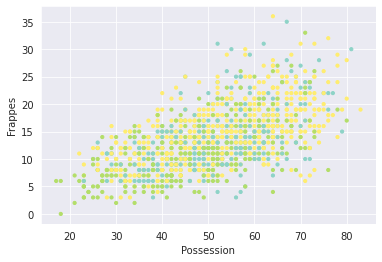

In [ ]:
fig, ax = plt.subplots()
plt.scatter(data[['H_PT']], X_all[['H_ST']], c=y_all, s = 10, cmap='Set3')
plt.xlabel('Possession')
plt.ylabel('Frappes')

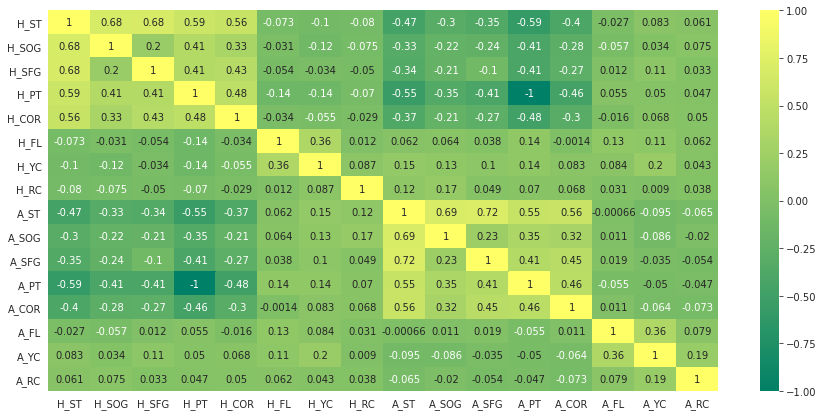

In [ ]:
fig, ax = plt.subplots(figsize =(15,7))
correlations = X_all.corr()
sns.heatmap(correlations, annot=True, cmap='summer')

# Data Visualisation

In [ ]:
import plotly.express as px
df = data
fig = px.scatter(df, x="H_PT", y="H_COR", color="FTR", trendline="lowess", template="simple_white", size="FTHG",
                 labels={
                     "H_PT": "Possession Home Team (%)",
                     "H_COR": "Numbers of corners "
                 },
                title="Graphic Analysis 1 : Scatter Plot - Possesion")
fig.show()


In [ ]:
import plotly.express as px
df = data
fig = px.scatter(df, x="H_ST", y="A_ST", color=y_all, trendline="lowess", template="simple_white", size="H_PT",
                 labels={
                     "H_ST": "Home Team Total Shots",
                     "A_ST": "Away Team Total Shots"
                 },
                title="Graphic Analysis 2 : Scatter Plot - Home Team Total Shot")
fig.show()



In [ ]:
plotly.__version__

'4.4.1'

In [ ]:
pip install plotly==4.7.1

In [ ]:
"""
ATTENTION : La version 4.7.1 de plotly est nécessaire pour le Treemap.
De plus quand j'a rentré l'argument data j'ai eu une erreur ;
DataFrame constructor not properly called.
Car data est un mot clé.... 
"""


from plotly import *
import plotly.express as px
import plotly.graph_objects as pg


df2 = pd.DataFrame(pd.read_csv('PL.csv'))

fig = px.treemap(df2, path=["FTR","H_ST"],
                 values="H_SOG",
                 title="Graphic Analysis 3 : Treemap - Results by Shots"
                 )
fig.update_layout(treemapcolorway =  ["Gold ", "Teal ", "Indigo"])

fig.show()


# Clustering with K-Means

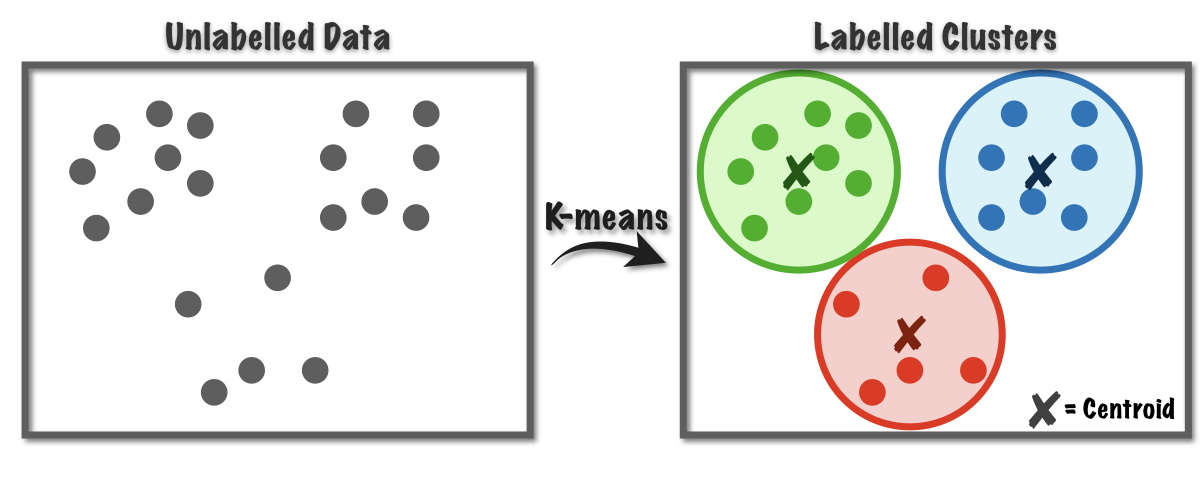

In [ ]:
"""
Applications du cours de M Trabelsi
La théorie footballistique nous dit que l'on peut cluster les équipes
en 2 grandes catégories. Les équipes de possession 
telles que Barcelone, Manchester City ou PSG
et les équipes basées sur le contre qui refusent volontairement la possession
comme par exemple l'Atletico Madrid ou Liverpool. Nous allons voir si 
la théorie se justifie. Cherchons le nombre idéal K de cluster
"""

from sklearn.cluster import KMeans


score_1 = []

range_values = range(1,10) #On test sur 10 clusters, pas la peine de classer les équipes selon +10 catégories sinon ça perd du sens....

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_all)
  score_1.append(kmeans.inertia_)

#Algortihme qui se cache derriere KMeans : On place des centres au milieu de nos 
#observatiobns. Une observation va dans un cluster lorsque sa distance avec ce 
#cluster en particulier est la plus petite. Une fois que tous les observations
#sont assignés a des clusters : ON REPLACE NOTRE CENTROIDE ALEATOIRE AU MILIEU DU CLUSTER. 
#On réitère l'opération...


Les valeurs du score sont : 
 [536370.6022827041, 255630.88879021115, 186831.08702676787, 158372.12006341337, 144546.32941289345, 136234.9061331418, 128843.49967806232, 123107.7974275877, 119118.24427954631] 




<function matplotlib.pyplot.show>

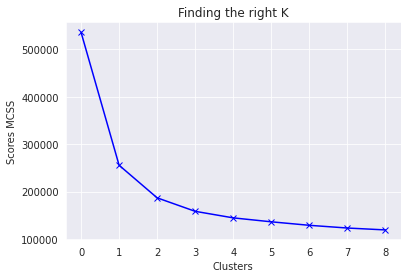

In [ ]:
"""
On constate que a partir du K = 2 les variations ne sont plu aussi puissantes
ainsi classer les équipes 2 foot selon 2 grands clusters semblent assez 
justifier. Bien sur on peut encore rajouter un 3e cluster pour les équipes
comme le Real Madrid qui arrivent à allier possession et attaques rapides.
La courbe est justifiée par la théorie : quand on a 1 cluster la distance
entre le centre et les observations est grande. 2 clusters donc les 2 se trouvent
aux centres des observations donc la distance se réduit, et cetera...
"""
print("Les valeurs du score sont : \n {}".format(score_1),"\n\n")

plt.plot(score_1, 'bx-')
plt.title('Finding the right K')
plt.xlabel('Clusters')
plt.ylabel('Scores MCSS')
plt.show

In [ ]:
kmeans = KMeans(2)
kmeans.fit(X_all)
labels = kmeans.labels_
print(f"Les valeurs du label sont : {labels}")
print(f"La shape de nos label est : {labels.shape}")
print(f"Label max : {labels.max()}") # C'est 1 car j'ai choisi 2 clusters [0 ou 1]

Les valeurs du score sont : [1 1 0 ... 0 1 0]
La shape de nos label est : (1139,)
Label max : 1


In [ ]:
X_all_cluster = pd.concat([X_all,pd.DataFrame({'Cluster':labels})], axis = 1)
X_all_cluster.head()

,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC,Cluster
0,27,10,9,64,9,9,0,0,6,3,3,36,4,12,1,0,1
1,19,6,6,59,8,16,4,2,10,5,4,41,5,11,3,0,1
2,9,4,4,49,3,14,0,0,14,5,8,51,3,8,3,0,0
3,6,2,2,27,3,6,0,0,14,4,5,73,10,9,2,0,0
4,29,2,16,59,13,10,2,0,4,0,2,41,0,13,1,0,1


In [ ]:
print(type(X_all_cluster['Cluster']))
a = pd.DataFrame(X_all_cluster['Cluster'])
print(type(a))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


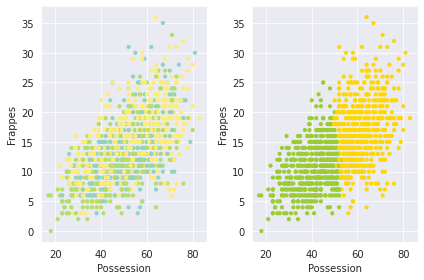

In [ ]:
#z = np.array(X_all_cluster['Cluster'])
#colors = np.array(["yellowgreen", "gold"])


#fig = plt.subplot(1,2,1)
#plt.scatter(data[['H_PT']], X_all[['H_ST']], c=y_all, s = 10, cmap='Set3')
#plt.xlabel('Possession')
#plt.ylabel('Frappes')
#plt.tight_layout()


#fig2 = plt.subplot(1,2,2)
#plt.scatter(data[['H_PT']], X_all[['H_ST']], c=colors[z], s = 10)
#plt.xlabel('Possession')
#plt.ylabel('Frappes')
#plt.tight_layout()

# Princpal Component analysis

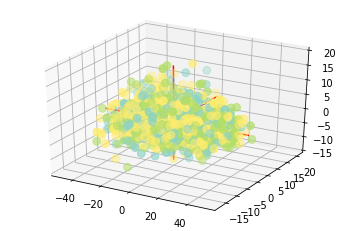

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# Run the PCA
pca = PCA(n_components=3)
pca.fit(X_all)
my_col = data['FTR']



# Store PCA in a pandas var
result=pd.DataFrame(pca.transform(X_all), columns=['PCA%i' % i for i in range(3)], index=X_all.index)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c = my_col, cmap="Set3", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# Training and Evaluating Models

In [ ]:
"""
Sklearn is the most efficient way to split our data in train and test set
using the fonction train_test_split
"""

from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)
### Your test size is too small (only 50 observations) -> try to split the original sample in 0.80 train and 0.20 test 

In [ ]:
X_train.shape
X_test.shape


(50, 16)

In [ ]:
print(X_train.iloc[1,:])

H_ST     30
H_SOG    10
H_SFG     8
H_PT     55
H_COR    13
H_FL     14
H_YC      1
H_RC      0
A_ST      3
A_SOG     2
A_SFG     1
A_PT     45
A_COR     2
A_FL      4
A_YC      0
A_RC      0
Name: 771, dtype: int64


***LOGISTIC REGRESSION***

---


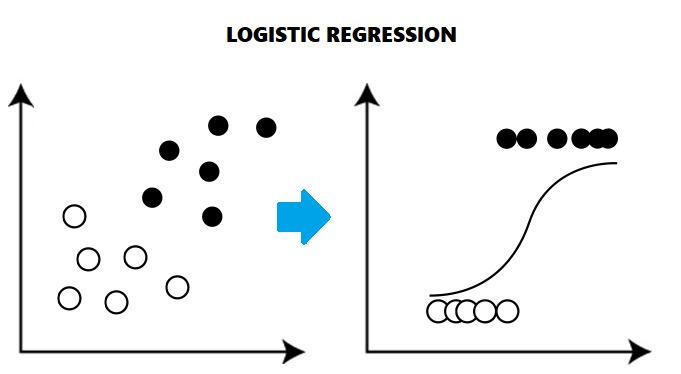

***SUPPORT VECTOR MACHINES***


---

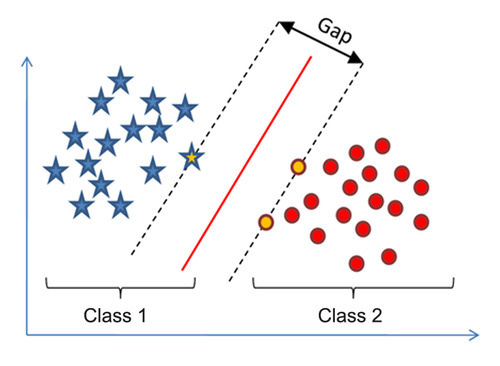



***xGBoost***

---

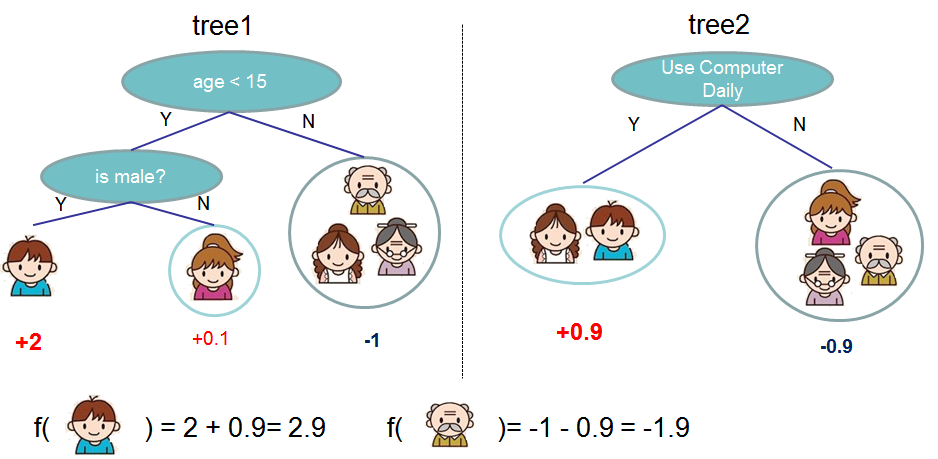

In [ ]:
"""
We try to run 3 differents classifier model, two of them saw in lectures
and one found on internet. xGBoost is kind of a Random Forrest. [???]
"""

####Try also random forest which is a ensembling models while xgboost is a boosted model. 

# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
# Boosting refers to this general problem of producing a very accurate prediction rule 
# by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)
clf_D = RandomForestClassifier(random_state=42)



# Training the data
clf_A.fit(X_train, y_train)
clf_B.fit(X_train, y_train)
clf_C.fit(X_train, y_train)
clf_D.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'LR Decision Region Boundary')

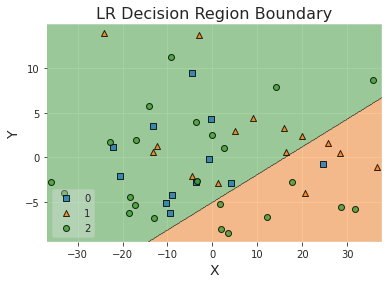

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf_LR = LogisticRegression(random_state = 42)
pca = PCA(n_components = 2)
X_test2 = pca.fit_transform(X_test)
clf_LR.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test.values, clf=clf_LR, legend=3)

plt.xlabel( X.columns[0], size=14)
plt.ylabel(X.columns[3], size=14)
plt.xlabel("X")
plt.ylabel("Y")

plt.title('LR Decision Region Boundary', size=16)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'SVM Decision Region Boundary')

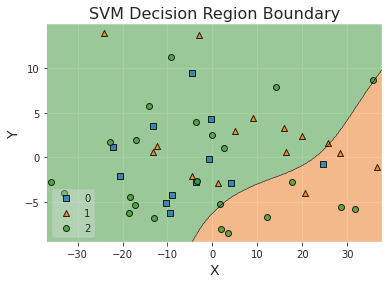

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf_SVM = SVC(random_state = 912, kernel='rbf')
pca = PCA(n_components = 2)
X_test2 = pca.fit_transform(X_test)
clf_SVM.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test.values, clf=clf_SVM, legend=3)

plt.xlabel( X.columns[5], size=14)
plt.ylabel( X.columns[1], size=14)
plt.xlabel("X")
plt.ylabel("Y")

plt.title('SVM Decision Region Boundary', size=16)



In [ ]:
"""
For each classifier (A,B & C) we make preidction using predict()
"""

y_A_pred = clf_A.predict(X_test)
y_B_pred = clf_B.predict(X_test)
y_C_pred = clf_C.predict(X_test)
y_D_pred = clf_D.predict(X_test)

In [ ]:
pd.DataFrame([y_A_pred,y_B_pred,y_C_pred, y_D_pred]).transpose().head(5) #this is your prediction (0:A_pred, etc.)

,0,1,2,3
0,1,1,1,1
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_A_pred, y_test)
accuracyA = 100*sum(np.diag(confusion_matrix(y_A_pred, y_test)))/len(y_test)
print("La précision du modèle est de : "+str(accuracyA)+" %")

La précision du modèle est de : 66.0 %


In [ ]:
confusion_matrix(y_B_pred, y_test)
accuracyB = 100*sum(np.diag(confusion_matrix(y_B_pred, y_test)))/len(y_test)
print("La précision du modèle est de : "+str(accuracyB)+" %")

La précision du modèle est de : 64.0 %


In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_A_pred, pos_label='H', average='micro'))
print(f1_score(y_test, y_B_pred, pos_label='H', average='micro'))
print(f1_score(y_test, y_C_pred, pos_label='H', average='micro'))
print(f1_score(y_test, y_D_pred, pos_label='H', average='micro'))

#F1 score is the harmonic mean of precision and recall.

0.66
0.64
0.62
0.58


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_A_pred))
print(metrics.classification_report(y_test, y_B_pred))
print(metrics.classification_report(y_test, y_C_pred))
print(metrics.classification_report(y_test, y_D_pred))

# Artificial Neuronal Network

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/rEDzUT3ymw4?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [ ]:
data.shape

(1139, 35)

In [ ]:
print(X_train.shape,"\n\n", type(X_train))

(1089, 16) 

 <class 'pandas.core.frame.DataFrame'>


In [ ]:
model = Sequential([
                    Dense(16, input_shape=(16,), activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(3, activation='softmax')
])


# Input shape represent the number of columns if you have a dataframe or the channels in input if you have an image

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=5
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2,
                    batch_size = 10)


# A lot of parameters (epochs, loss, etc.) are not properly set...

Epoch 1/5
88/88 - 0s - loss: 1.3786 - accuracy: 0.3226 - val_loss: 1.5527 - val_accuracy: 0.2752
Epoch 2/5
88/88 - 0s - loss: 1.2988 - accuracy: 0.3605 - val_loss: 1.3134 - val_accuracy: 0.2798
Epoch 3/5
88/88 - 0s - loss: 1.2865 - accuracy: 0.3582 - val_loss: 1.2903 - val_accuracy: 0.3486
Epoch 4/5
88/88 - 0s - loss: 1.2748 - accuracy: 0.3582 - val_loss: 1.3066 - val_accuracy: 0.2615
Epoch 5/5
88/88 - 0s - loss: 1.2703 - accuracy: 0.3318 - val_loss: 1.2778 - val_accuracy: 0.2661


In [ ]:
score = model.evaluate(X_test, y_test,
                        verbose=1)
print('Test accuracy:', score[1])

# Accuracy -- read this blog to have an explanation on the low performance of NN:
# https://datascience.stackexchange.com/questions/38392/why-neural-networks-do-not-perform-well-on-structured-data

2/2 [==============================] - 0s 2ms/step - loss: 1.2608 - accuracy: 0.2600
Test accuracy: 0.25999999046325684


In [ ]:
#Let's try some predictions
predictions = model.predict(X_test)
print(X_test.shape,"\n\n", predictions)
# The next step will be : If I have a vector of informations concerning a team
# For exemple the mean shot, the mean fouls conceded ...
# Can I use model.predict(vector_informations) ???

In [ ]:
"""
Ok, so the goal of this cell is : a regular guy want to predict if a team will win
based on the mean averga shot, mean corner get during the match, mean yellow card get
Donc j'ai remarqué que pour utilisé predict il faut comme type pd.DateFrame et que pd.Serie 
ne marche pas. Il faur que la dimension soit (1x16) et non pas (16x1)

"""

print(type(X_test))
print(X_test.shape)
X_try = pd.DataFrame(X_test.iloc[0])
print(type(X_try))
print(X_try.T.shape)
predictions = model.predict(X_try.T)
print(predictions)

<class 'pandas.core.frame.DataFrame'>
(50, 16)
<class 'pandas.core.frame.DataFrame'>
(1, 16)
[[0.3257082  0.3618412  0.31245056]]


In [ ]:
"""
Donc le but maintenant est de faire une fonction générique qui prend en argument
un classifier et les données de la personne c-a-d nombre de tirs, fautes etc...
Si la personne n'a pas toutes les données (16/16) on va mettre les données manquantes
à 0 et prédire comme ça
"""


def pronostics(classifier, data):
  pass